**Image Classification
Problem: Classify images of handwritten digits into categories (0-9).**

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


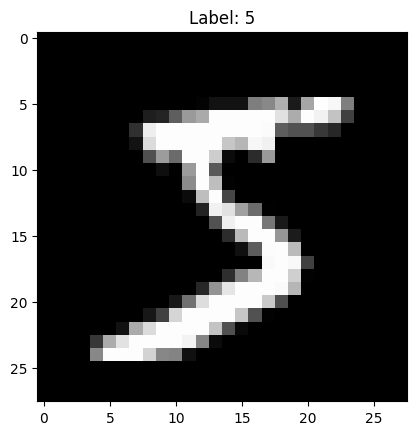

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize images (scale pixel values to range 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display a sample image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()


In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8699 - loss: 0.4747 - val_accuracy: 0.9570 - val_loss: 0.1524
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9620 - loss: 0.1314 - val_accuracy: 0.9652 - val_loss: 0.1169
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9736 - loss: 0.0868 - val_accuracy: 0.9707 - val_loss: 0.1004
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0616 - val_accuracy: 0.9732 - val_loss: 0.0954
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0475 - val_accuracy: 0.9744 - val_loss: 0.0851
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9898 - loss: 0.0352 - val_accuracy: 0.9727 - val_loss: 0.0912
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0302 - val_accuracy: 0.9726 - val_loss: 0.0961
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9945 - loss: 0.0211 - 

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.0742
Test Accuracy: 0.9786


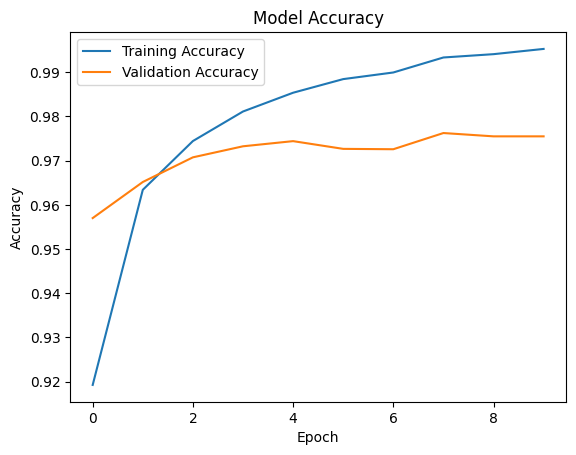

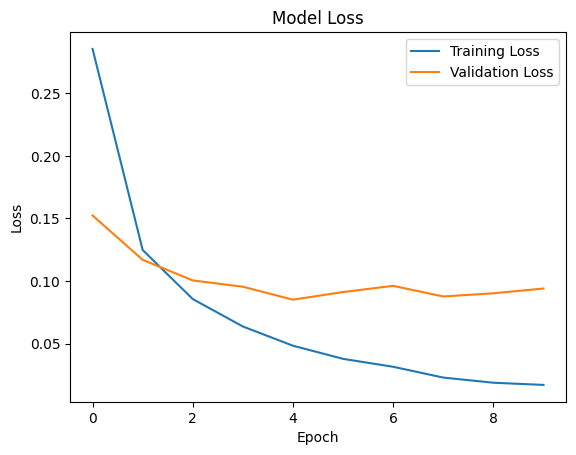

In [7]:
# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


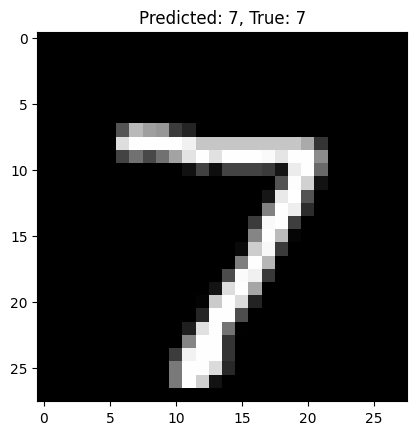

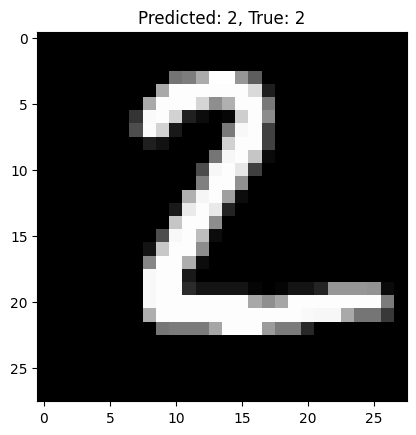

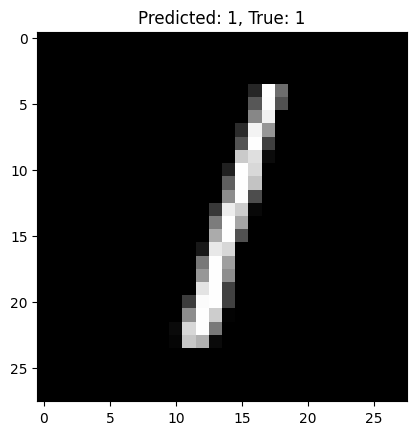

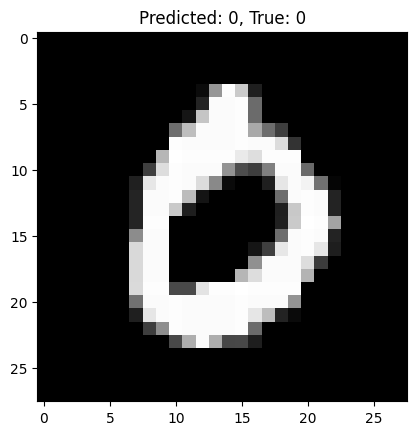

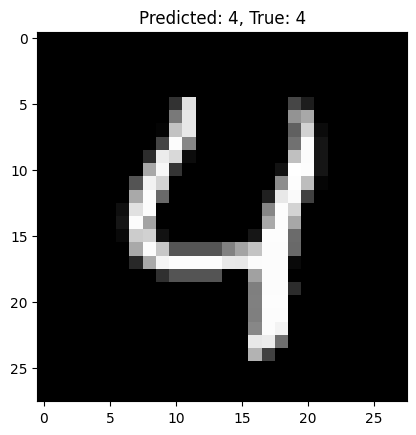

In [8]:
# Predict on test data
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

# Display test samples with predictions
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True: {np.argmax(y_test[i])}")
    plt.show()
